In [1]:
import pandas as pd
import numpy as np
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
test.head()

,username,description
0,nikhilmalik__,inside this innocent look is a twisted mind|||...
1,shivani_narayanan,dream without fear love without limits|||belie...
2,shamitashetty_official,always be a first rate version of yourself ins...
3,theshilpashetty,never allow someone else to dull your shine|||...
4,im_raveena_daha,of all the paths you take in life make sure a...


In [7]:
print('Number of rows and columns in train data:{}' .format(train.shape))
print('Number of rows and columns in test data:{}' .format(test.shape))

Number of rows and columns in train data:(8675, 2)
Number of rows and columns in test data:(52, 2)


In [8]:
# Is there any missing data in any of the columns?
train.isnull().sum()

type     0
posts    0
dtype: int64

In [9]:
test.isnull().sum()

username       0
description    0
dtype: int64

In [10]:
# How many posts were written by each personality type?
type_sum = train.groupby(['type']).count()
type_sum.sort_values('posts', ascending=False, inplace=True)
type_sum

,posts
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


In [11]:
# How many total words were written by each personality type?
train['word_count'] = train['posts'].apply(lambda x: len(str(x).split(" ")))
word_count = train.groupby('type').sum()
word_count.sort_values('word_count', ascending=False, inplace=True)
word_count

,word_count
type,
INFP,2346749
INFJ,1935518
INTP,1606399
INTJ,1343332
ENFP,876141
ENTP,850974
ISTP,404616
ISFP,316165
ENTJ,290309


In [12]:
#drop word_count column
train = train.drop(['word_count'], axis=1)

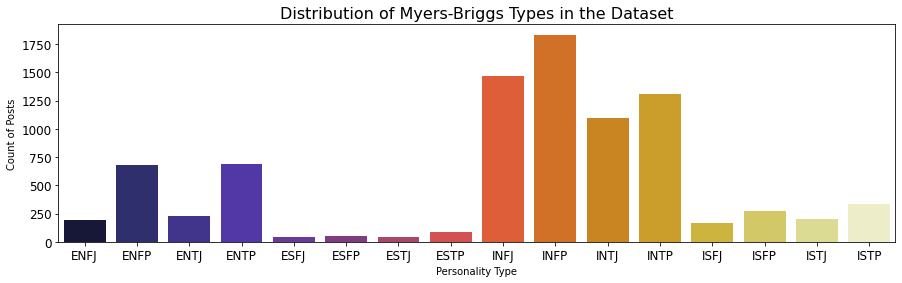

In [13]:
# Distribution of the Personality Types
dim = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dim)
cmrmap = sns.color_palette('CMRmap', 16)
sns.set_palette(cmrmap)
sns.countplot(x='type', data=train,
              order=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',
                     'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP',
                     'ISTJ', 'ISTP'])
plt.title('Distribution of Myers-Briggs Types in the Dataset', fontsize=16)
plt.xlabel('Personality Type')
plt.ylabel('Count of Posts')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
# Create a binary column for each of the 4 dimension types
train['Mind'] = train['type'].map(lambda x: 'Extroverted'
                                  if x[0] == 'E' else 'Introverted')
train['Energy'] = train['type'].map(lambda x: 'Intuitive'
                                    if x[1] == 'N' else 'Sensing')
train['Nature'] = train['type'].map(lambda x: 'Thinking'
                                    if x[2] == 'T' else 'Feeling')
train['Tactics'] = train['type'].map(lambda x: 'Judging'
                                     if x[3] == 'J' else 'Perceiving')

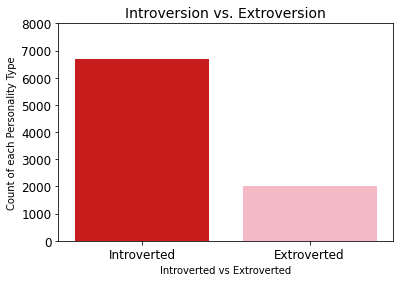

In [15]:
# Mind
# Countplot of the Introverted - Extroverted variable
IEcolors = sns.xkcd_palette(['red', 'soft pink'])
sns.set_palette(IEcolors)
sns.countplot(x='Mind', data=train, order=['Introverted', 'Extroverted'])
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Introverted vs Extroverted')
plt.ylabel('Count of each Personality Type')
plt.title('Introversion vs. Extroversion', fontsize=14)
plt.show()

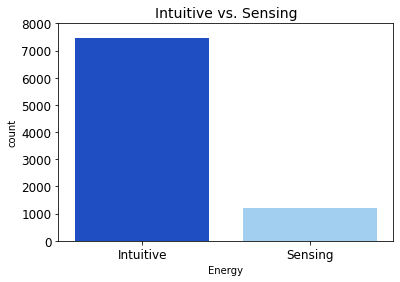

In [16]:
# Countplot of the Intuitive - Sensing variable
NScolors = sns.xkcd_palette(['blue', 'light blue'])
sns.set_palette(NScolors)
sns.countplot(x='Energy', data=train, order=['Intuitive', 'Sensing'])
plt.title('Intuitive vs. Sensing', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

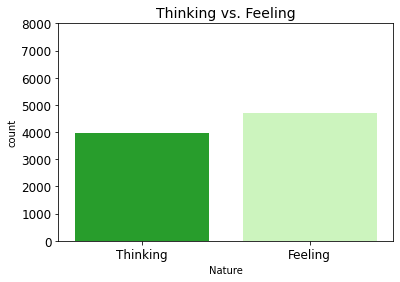

In [18]:
# Countplot of the Thinking - Feeling variable
TFcolors = sns.xkcd_palette(['green', 'pale green'])
sns.set_palette(TFcolors)
sns.countplot(x='Nature', data=train, order=['Thinking', 'Feeling'])
plt.title('Thinking vs. Feeling', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


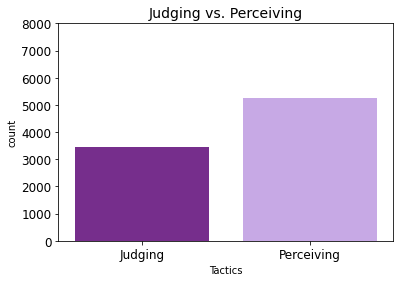

In [17]:
# Countplot of Judging - Perceiving
JPcolors = sns.xkcd_palette(['purple', 'lavender'])
sns.set_palette(JPcolors)
sns.countplot(x='Tactics', data=train, order=['Judging', 'Perceiving'])
plt.title('Judging vs. Perceiving', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [19]:
# Removing delimeters

def remove_delimiters (post):
    new = post.replace('|||',' ')
    return ' '.join(new.split())

train['posts'] = train['posts'].apply(remove_delimiters)
test['description'] = test['description'].apply(remove_delimiters)

In [20]:
# Removing URLs
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'

#apply to train set
train['posts'] = train['posts'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#apply to test set
test['description'] = test['description'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [22]:
# Convert words to lowercase
train['posts'] = train['posts'].str.lower()

test['description'] = test['description'].str.lower()

In [21]:
# Remove punctuation and numbers
#Remove punctuation & numbers
def remove_punctuation(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

train['posts'] = train['posts'].apply(remove_punctuation)

test['description'] = test['description'].apply(remove_punctuation)

In [23]:
# Lematise posts
lemmatizer = WordNetLemmatizer()
train['lemma'] = [' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])for text in train['posts']]
test['lemma'] = [' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])for text in test['description']]

In [24]:
#Check for stopwords train
stop = stopwords.words('english')
train['stopwords'] = train['lemma'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['lemma','stopwords']].head()

,lemma,stopwords
0,urlweb urlweb enfp and intj moment urlweb spor...,257
1,im finding the lack of me in these post very a...,587
2,good one urlweb of course to which i say i kn...,402
3,dear intp i enjoyed our conversation the other...,529
4,youre fired thats another silly misconception ...,495


In [25]:
#Check for stopwords test
stop = stopwords.words('english')
test['stopwords'] = test['lemma'].apply(lambda x: len([x for x in x.split() if x in stop]))
test[['lemma','stopwords']].head()

,lemma,stopwords
0,inside this innocent look is a twisted mind a ...,11
1,dream without fear love without limit believe ...,9
2,always be a first rate version of yourself ins...,30
3,never allow someone else to dull your shine th...,38
4,of all the path you take in life make sure a f...,12


In [26]:
def remove_stop_words(word):
    if word not in stop:
        return word
    else:
        return ''
test['lemma_no_stop'] = [' '.join([remove_stop_words(word) for word in text.split(' ')])for text in test['lemma']]

In [27]:
test.head()

,username,description,lemma,stopwords,lemma_no_stop
0,nikhilmalik__,inside this innocent look is a twisted mind a ...,inside this innocent look is a twisted mind a ...,11,inside innocent look twisted mind vision w...
1,shivani_narayanan,dream without fear love without limits believe...,dream without fear love without limit believe ...,9,dream without fear love without limit believe ...
2,shamitashetty_official,always be a first rate version of yourself ins...,always be a first rate version of yourself ins...,30,always first rate version instead second...
3,theshilpashetty,never allow someone else to dull your shine th...,never allow someone else to dull your shine th...,38,never allow someone else dull shine world s...
4,im_raveena_daha,of all the paths you take in life make sure a ...,of all the path you take in life make sure a f...,12,path take life make sure dirt limit...


In [28]:
# Model Building
#Create binary classes for each of the personality characteristics
train['E'] = train['type'].apply(lambda x: x[0] == 'E').astype('int')
train['N'] = train['type'].apply(lambda x: x[1] == 'N').astype('int')
train['T'] = train['type'].apply(lambda x: x[2] == 'T').astype('int')
train['J'] = train['type'].apply(lambda x: x[3] == 'J').astype('int')

In [29]:
train.head()

,type,posts,Mind,Energy,Nature,Tactics,lemma,stopwords,E,N,T,J
0,INFJ,urlweb urlweb enfp and intj moments urlweb spo...,Introverted,Intuitive,Feeling,Judging,urlweb urlweb enfp and intj moment urlweb spor...,257,0,1,0,1
1,ENTP,im finding the lack of me in these posts very ...,Extroverted,Intuitive,Thinking,Perceiving,im finding the lack of me in these post very a...,587,1,1,1,0
2,INTP,good one urlweb of course to which i say i kn...,Introverted,Intuitive,Thinking,Perceiving,good one urlweb of course to which i say i kn...,402,0,1,1,0
3,INTJ,dear intp i enjoyed our conversation the other...,Introverted,Intuitive,Thinking,Judging,dear intp i enjoyed our conversation the other...,529,0,1,1,1
4,ENTJ,youre fired thats another silly misconception ...,Extroverted,Intuitive,Thinking,Judging,youre fired thats another silly misconception ...,495,1,1,1,1


In [30]:
mind_df = train[['lemma','E']]

In [32]:
# Model Building

    #classifiers
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import AdaBoostClassifier

    #vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

    #training features
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

    #performance measures
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer

In [33]:
vect_mind = TfidfVectorizer(lowercase=True, 
                            stop_words='english', 
                            max_features=250,
                            min_df=4,
                            max_df=0.5
                           )

In [34]:
vect_mind.fit(mind_df['lemma'])
X_count_mind = vect_mind.transform(mind_df['lemma'])

In [39]:
def tune_LogReg_model(X_train, y_train): 
    C_list = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 5, 10, 25, 100]
    penalty_list = ['l1','l2']

    score = make_scorer(scoring_function_log_loss, greater_is_better = False)
    
    logreg = LogisticRegression()
    
    parameters = {'C':C_list,
                  'penalty': penalty_list}
    tune = GridSearchCV(logreg, parameters, scoring = score)
    tune.fit(X_train,y_train)
    
    return tune

In [42]:
X = X_count_mind
y = mind_df['E']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size =0.3,
                                                   random_state = 42)

In [44]:
def scoring_function_log_loss(y_test, y_pred_test):
    return log_loss(y_test, y_pred_test)

In [45]:
score_log_loss = make_scorer(scoring_function_log_loss, greater_is_better = False)

In [46]:
best_mind_model = tune_LogReg_model(X_train, y_train)

C:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Parthasarat

In [47]:
mind_model = LogisticRegression(C=best_mind_model.best_params_['C'], penalty = best_mind_model.best_params_['penalty'])
mind_model.fit(X_train, y_train)

LogisticRegression(C=5)

In [48]:
y_pred_train = mind_model.predict(X_train)

In [49]:
accuracy_score(y_train, y_pred_train)

0.8679183135704874

In [50]:
y_pred_test = mind_model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred_test)

0.8586246638494045

In [52]:
confusion_matrix(y_train, y_pred_train)

array([[4437,  208],
       [ 594,  833]], dtype=int64)

In [53]:
confusion_matrix(y_test, y_pred_test)

array([[1918,  113],
       [ 255,  317]], dtype=int64)

In [54]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4645
           1       0.80      0.58      0.68      1427

    accuracy                           0.87      6072
   macro avg       0.84      0.77      0.80      6072
weighted avg       0.86      0.87      0.86      6072



In [55]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2031
           1       0.74      0.55      0.63       572

    accuracy                           0.86      2603
   macro avg       0.81      0.75      0.77      2603
weighted avg       0.85      0.86      0.85      2603



In [56]:
log_loss(y_train, y_pred_train)

4.56196722414095

In [57]:
log_loss(y_test, y_pred_test)

4.882965834743275

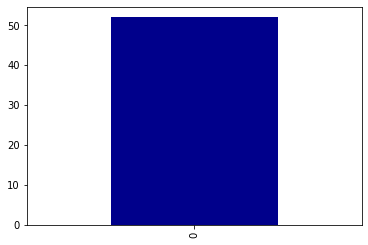

,username,E_pred
0,nikhilmalik__,0
1,shivani_narayanan,0
2,shamitashetty_official,0
3,theshilpashetty,0
4,im_raveena_daha,0
5,srideviashok_official,0
6,shrutzhaasan,0
7,shrutisinhahaha,0
8,rannvijaysingha,0
9,randeepraii,0


In [58]:
# Predicting mind
pred_mind_count = vect_mind.transform(test['lemma_no_stop'])

pred_mind_count.shape

X = X_count_mind
y = mind_df['E']

final_mind_model = mind_model
final_mind_model.fit(X, y)

final_mind_predictions = final_mind_model.predict(pred_mind_count)

test['E_pred'] = final_mind_predictions

test.head()

pred_mind_df = test[['username', 'E_pred']]

pred_mind_df.head(10)

pred_mind_df.columns

pred_mind_df['E_pred'].value_counts().plot(kind = 'bar',color = ['darkblue','dodgerblue'])

#pred_mind_df

plt.show()

pred_mind_df.head(10)